# Product Market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [141]:
market = pd.read_csv('supermarket_sales.csv')
market.shape

(1000, 17)

In [142]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [143]:
market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,$74.69,7,$26.14,$548.97,1/5/2019,13:08,Ewallet,$522.83,$4.76,$26.14,$9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,$15.28,5,$3.82,$80.22,3/8/2019,10:29,Cash,$76.40,$4.76,$3.82,$9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,$46.33,7,$16.22,$340.53,3/3/2019,13:23,Credit card,$324.31,$4.76,$16.22,$7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,$58.22,8,$23.29,$489.05,1/27/2019,20:33,Ewallet,$465.76,$4.76,$23.29,$8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,$86.31,7,$30.21,$634.38,2/8/2019,10:37,Ewallet,$604.17,$4.76,$30.21,$5.30


In [144]:
market.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,$40.35,1,$2.02,$42.37,1/29/2019,13:46,Ewallet,$40.35,$4.76,$2.02,$6.20
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,$97.38,10,$48.69,"$1,022.49",3/2/2019,17:16,Ewallet,$973.80,$4.76,$48.69,$4.40
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,$31.84,1,$1.59,$33.43,2/9/2019,13:22,Cash,$31.84,$4.76,$1.59,$7.70
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,$65.82,1,$3.29,$69.11,2/22/2019,15:33,Cash,$65.82,$4.76,$3.29,$4.10
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,$88.34,7,$30.92,$649.30,2/18/2019,13:28,Cash,$618.38,$4.76,$30.92,$6.60


In [145]:
market.columns = market.columns.str.lower()

In [146]:
print(market.dtypes)

invoice id                  object
branch                      object
city                        object
customer type               object
gender                      object
product line                object
unit price                 float64
quantity                     int64
tax 5%                     float64
total                      float64
date                        object
time                        object
payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
rating                     float64
dtype: object


In [147]:
pd.options.display.float_format = '${:,.2f}'.format

market.head()

,invoice id,branch,city,customer type,gender,product line,unit price,quantity,tax 5%,total,date,time,payment,cogs,gross margin percentage,gross income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,$74.69,7,$26.14,$548.97,1/5/2019,13:08,Ewallet,$522.83,$4.76,$26.14,$9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,$15.28,5,$3.82,$80.22,3/8/2019,10:29,Cash,$76.40,$4.76,$3.82,$9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,$46.33,7,$16.22,$340.53,3/3/2019,13:23,Credit card,$324.31,$4.76,$16.22,$7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,$58.22,8,$23.29,$489.05,1/27/2019,20:33,Ewallet,$465.76,$4.76,$23.29,$8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,$86.31,7,$30.21,$634.38,2/8/2019,10:37,Ewallet,$604.17,$4.76,$30.21,$5.30


In [148]:
market['date'] = market['date'].astype('datetime64[s]')

In [149]:
print(market.dtypes)

invoice id                         object
branch                             object
city                               object
customer type                      object
gender                             object
product line                       object
unit price                        float64
quantity                            int64
tax 5%                            float64
total                             float64
date                       datetime64[ns]
time                               object
payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
rating                            float64
dtype: object


In [150]:
market['date'].sort_values()

856   2019-01-01
567   2019-01-01
245   2019-01-01
696   2019-01-01
523   2019-01-01
         ...    
158   2019-03-30
881   2019-03-30
963   2019-03-30
937   2019-03-30
474   2019-03-30
Name: date, Length: 1000, dtype: datetime64[ns]

------------------------------------------------------------------------------------------------------------------------

## Conduct exploratory Data Analysis.

,quantity
date,
2019-01-01,12
2019-01-02,8
2019-01-03,8
2019-01-04,6
2019-01-05,12
...,...
2019-03-26,13
2019-03-27,10
2019-03-28,10


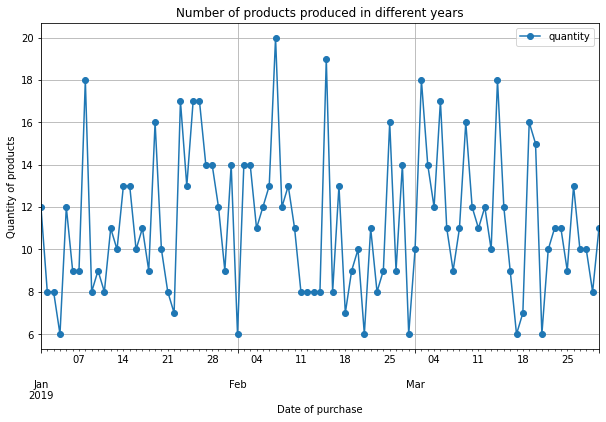

In [151]:
# Методом пивот отсортируем таблицы и отрисуем график, чтобы просмотреть как менялось количество выпускаемых игр
years = market.pivot_table(index = 'date', values = 'invoice id', aggfunc = 'count')
years.columns = ['quantity']
display(years)
years.plot(y = 'quantity', grid = True, figsize=(10,6), style='-o')
plt.title("Number of products produced in different years")
plt.xlabel("Date of purchase")
plt.ylabel("Quantity of products")
plt.show()

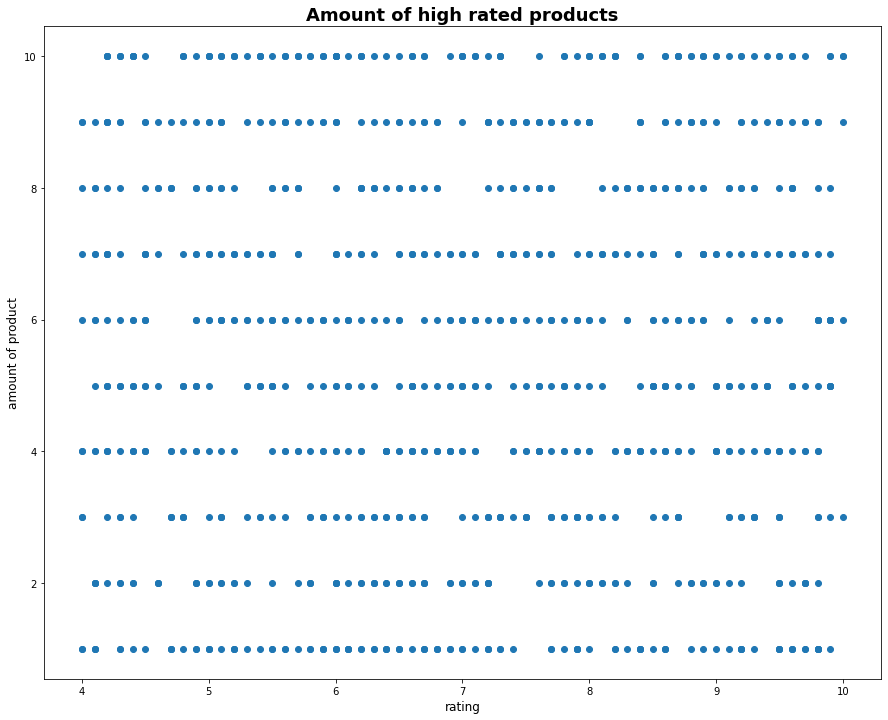

In [152]:


# Change the legend order in the scatter plot
plt.rcParams['figure.figsize'] = [15, 12] 

plt.scatter(market.rating, market.quantity)
plt.xlabel('rating', fontsize = 12)
plt.ylabel('amount of product', fontsize = 12)
plt.title('Amount of high rated products', fontsize = 18, fontweight = 'bold', horizontalalignment = 'center')

# Show plot
plt.show()

Difference in cumulative sales by branch.

A    340
B    332
C    328
Name: branch, dtype: int64

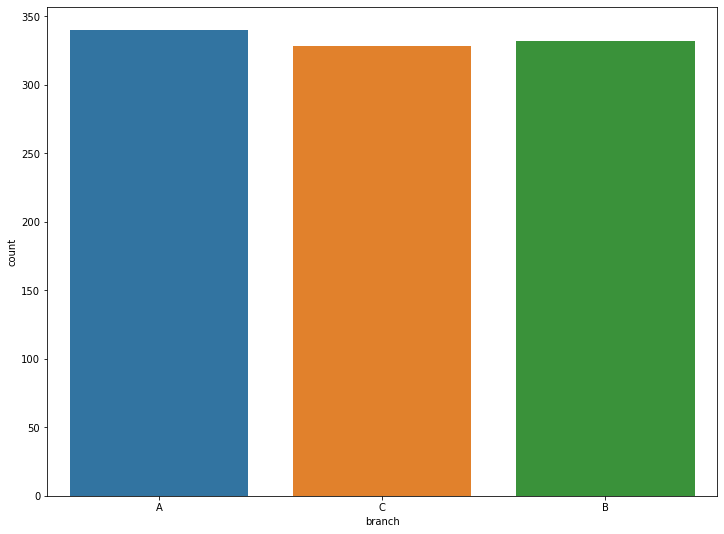

In [153]:
plt.rcParams['figure.figsize'] = [12, 9] 

sns.countplot(market['branch'])
market['branch'].value_counts()

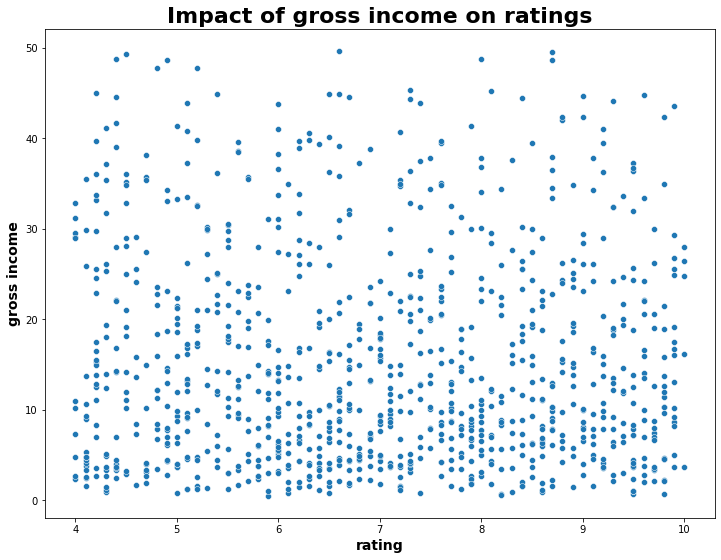

In [154]:
plt.rcParams['figure.figsize'] = [12, 9] 

sns.scatterplot(market['rating'], market['gross income'])
plt.title('Impact of gross income on ratings', fontsize = 22, fontweight = 'bold', position = (0.5, 1))
plt.xlabel('rating', fontsize = 14, fontweight = 'bold')
plt.ylabel('gross income', fontsize = 14, fontweight = 'bold')
plt.show()

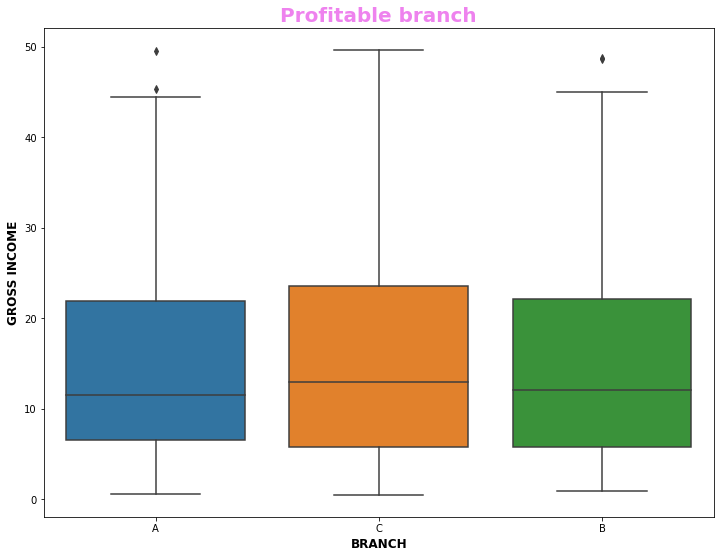

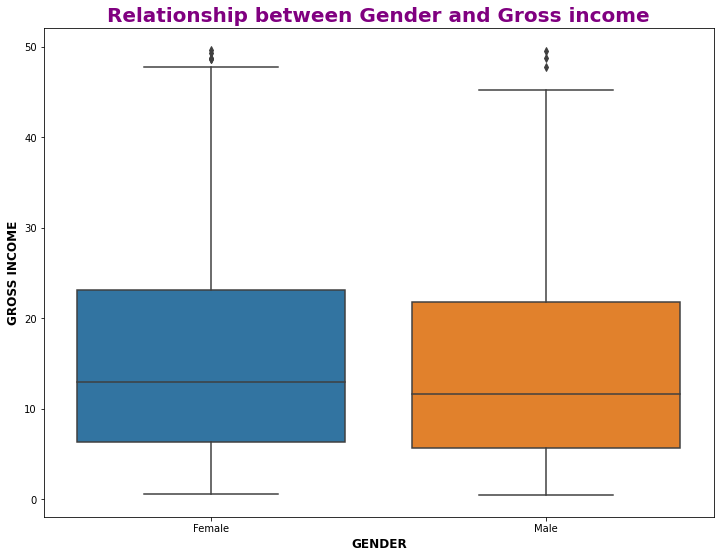

In [155]:
bp1 = sns.boxplot(x = market['branch'], y = market['gross income'])
bp1.set_title('Profitable branch', color = 'violet', fontsize = 20, fontweight = 'bold')
bp1.set_xlabel('BRANCH', fontsize = 12, fontweight = 'bold')
bp1.set_ylabel('GROSS INCOME', fontsize = 12, fontweight = 'bold')
plt.show()

bp2 = sns.boxplot(x = market['gender'], y = market['gross income'])
bp2.set_title('Relationship between Gender and Gross income', color = 'purple', fontsize = 20, fontweight = 'bold')
bp2.set_xlabel('GENDER', fontsize = 12, fontweight = 'bold')
bp2.set_ylabel('GROSS INCOME', fontsize = 12, fontweight = 'bold')
plt.show()

<AxesSubplot:xlabel='product line', ylabel='gross income'>

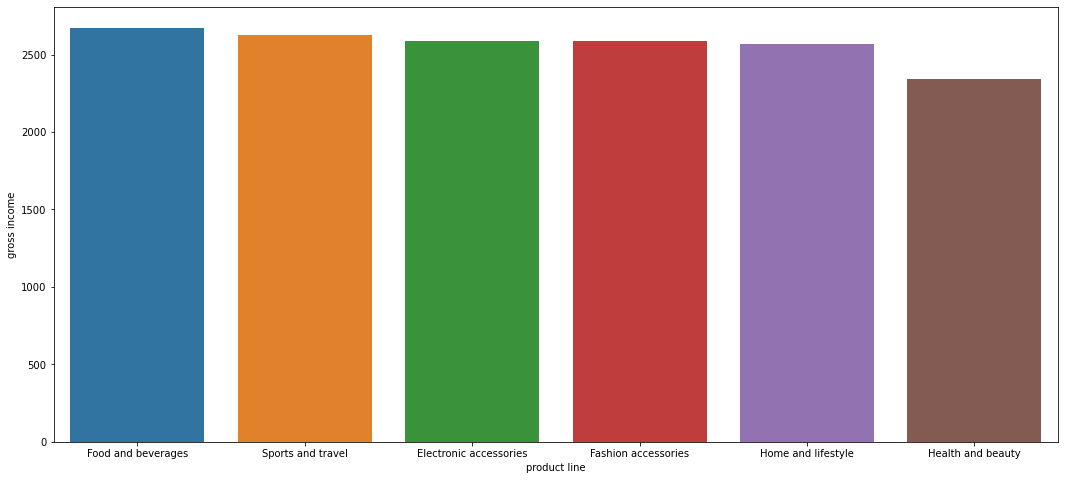

In [156]:
plt.rcParams['figure.figsize'] = [18, 8] 
a = market[["product line", "gross income"]].groupby(['product line'], as_index = False).sum().sort_values(by = 'gross income', ascending = False)
sns.barplot(x = 'product line', y = 'gross income', data = a)

<AxesSubplot:title={'center':'Monthly product transaction by gender(men / women)'}, xlabel='product line', ylabel='count'>

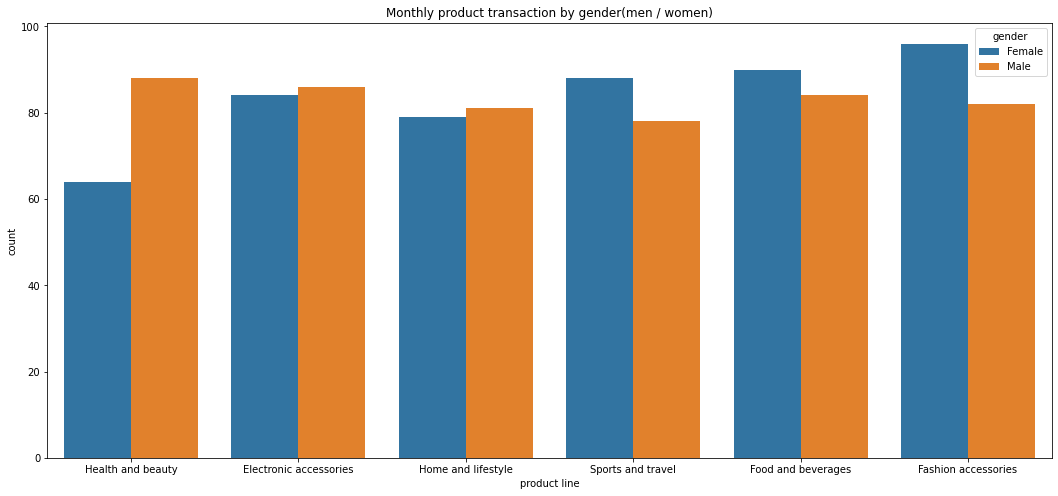

In [157]:
plt.rcParams['figure.figsize'] = [18, 8] 
plt.title('Monthly product transaction by gender(men / women)')
sns.countplot(market['product line'], hue = market.gender)